In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns

# Pre-requisites:

In [3]:
data = pd.read_csv("SalesData.csv")
data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [6]:
data.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

# 1. Compare Sales by region for 2016 with 2015 using bar chart

In [17]:
sales = data.groupby("Region")[["Sales2015","Sales2016"]].sum()

In [18]:
sales

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


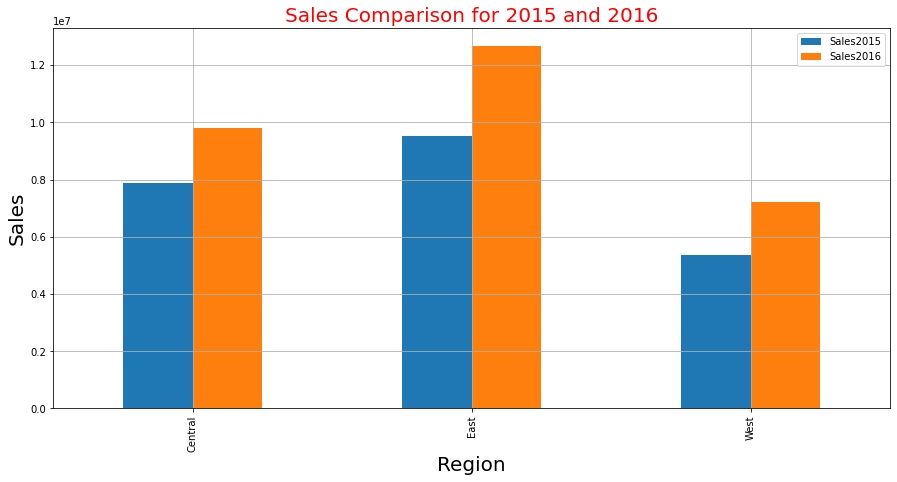

In [31]:
sales.plot(kind = "bar", figsize=(15,7))
plt.grid()
plt.title("Sales Comparison for 2015 and 2016", fontsize =20, color="red")
plt.ylabel('Sales',fontsize =20)
plt.xlabel('Region',fontsize =20)
plt.show()

# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [32]:
piesales = data.groupby("Region")[["Sales2016"]].sum()

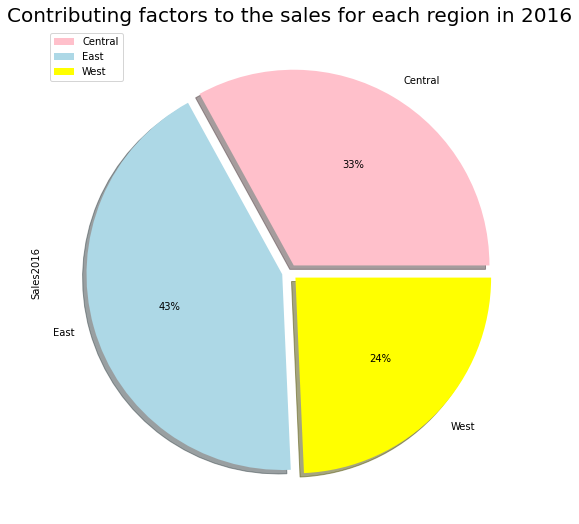

In [52]:
piesales.plot(kind ='pie', subplots=True , legend =True , autopct="%0.0f%%" ,
                  shadow = True,figsize =(9,9) ,explode=[0.04,0.04,0.04],colors=["pink","lightblue","yellow"])
plt.title('Contributing factors to the sales for each region in 2016',fontsize = 20)
plt.show()

# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [53]:
total = data.groupby(["Region","Tier"])[["Sales2015","Sales2016"]].sum()

In [54]:
total

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

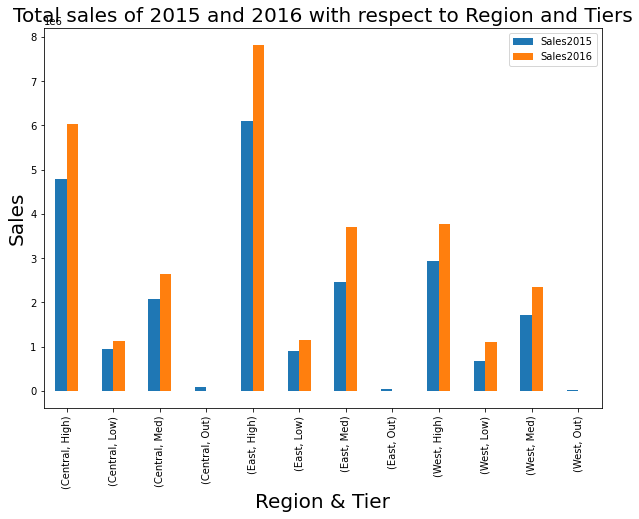

In [55]:
total.plot(kind = 'bar' , figsize = (10,7))
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Region & Tier',fontsize=20)
plt.title('Total sales of 2015 and 2016 with respect to Region and Tiers',fontsize=20)
plt.show()

# 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [56]:
east = data[data.Region == "East"]

In [63]:
df = east.groupby("State")[["Sales2015", "Sales2016"]].sum()

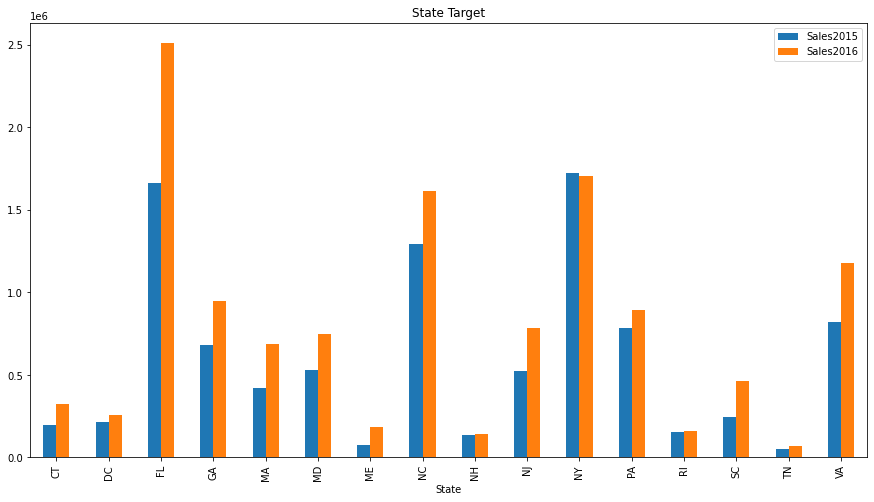

In [64]:
df.plot(kind="bar",figsize = (15,8))
plt.title("State Target")
plt.show()

# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [65]:
high = data[data.Tier=="High"]

In [66]:
high.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54
10,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Feb,9640.17,27316.66,3.0,10.0,1.06,1.08
17,2426,Account13,East,BIG APPLE,PATERSON,NJ,High,Oct,0.00,3128.34,0.0,1.0,1.42,1.23


In [69]:
df1 = high.groupby("Division")[["Units2015", "Units2016"]].sum()

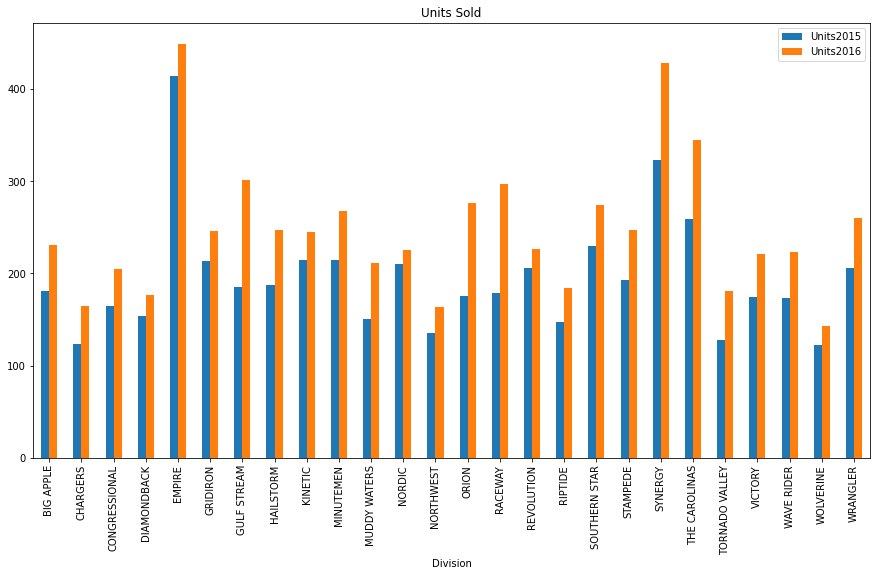

In [70]:
df1.plot(kind="bar",figsize = (15,8))
plt.title("Units Sold")
plt.show()

# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1<br>
• Apr - Jun : Q2<br>
• Jul - Sep : Q3<br>
• Oct - Dec : Q4 

In [71]:
def Qtr(x):
    if x.Month in ['Jan','Feb', 'Mar' ] :
        return 'Q1'
    elif x.Month in ['Apr','May', 'Jun' ] :
        return 'Q2'
    elif x.Month in ['Jul','Aug', 'Sep' ] :
        return 'Q3'
    else :
        return 'Q4'

In [72]:
data['Qtr']= data.apply(Qtr, axis=1)
data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


# 7.Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [74]:
qtr_data = data.groupby("Qtr")[["Sales2015","Sales2016"]].sum()

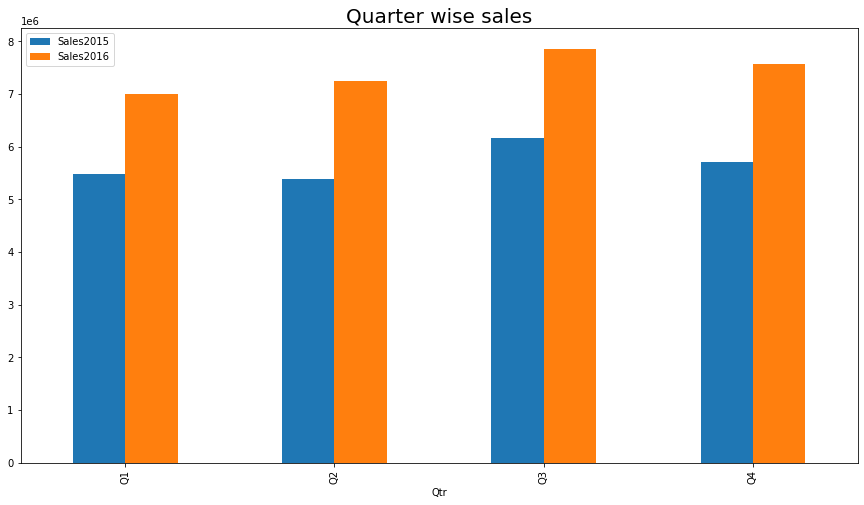

In [78]:
qtr_data.plot(kind="bar",figsize = (15,8))
plt.title("Quarter wise sales",fontsize=20)
plt.show()

# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [82]:
qtr = abs(pd.pivot_table(data , index='Tier' , columns= 'Qtr' , values= 'Sales2016' , aggfunc='sum'))
qtr

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3867718.595,4.130953e+06,4.872559e+06,4.740002e+06
Low,948832.770,8.905948e+05,7.951777e+05,7.426594e+05
Med,2181401.879,2.215814e+06,2.197058e+06,2.085207e+06
Out,0.000,0.000000e+00,3.248530e+03,0.000000e+00


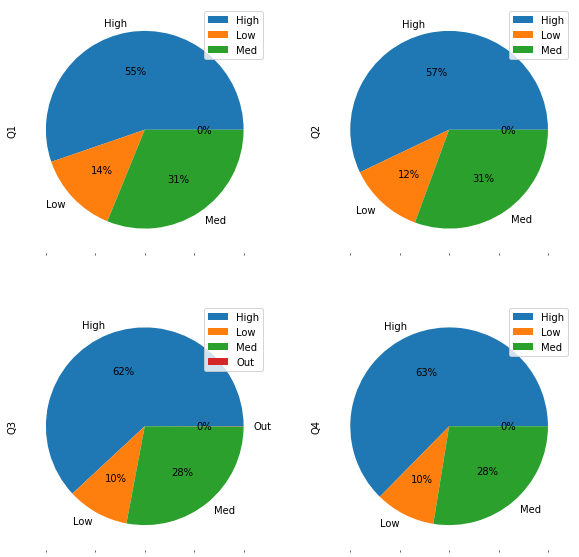

In [83]:
qtr.plot(kind='pie', subplots = True ,autopct="%1.0f%%" , figsize = (10,10), layout=(2, 2))
plt.show()